In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, confusion_matrix,make_scorer, classification_report, accuracy_score, f1_score, cohen_kappa_score
from sklearn.model_selection import cross_validate

from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
from tensorflow.keras.optimizers import Adam

import catboost as cb
import missingno as msno
from sklearn.model_selection import cross_val_score
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('weatherAUS.csv')

In [4]:
data.shape

(145460, 23)

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
col = data.columns
col

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
cat = [v for v in col if data[v].dtype == 'O']
print('There are {} Categorical Variables:\n'.format(len(cat)))
print(cat)

There are 7 Categorical Variables:

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
data[cat].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [10]:
for v in cat:
    print (v,'contains', len(data[v].unique()),'labesl')

Date contains 3436 labesl
Location contains 49 labesl
WindGustDir contains 17 labesl
WindDir9am contains 17 labesl
WindDir3pm contains 17 labesl
RainToday contains 3 labesl
RainTomorrow contains 3 labesl


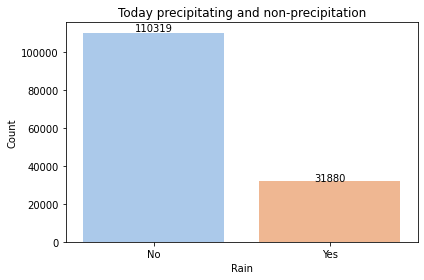

In [11]:
q = sns.countplot(x = data['RainToday'], palette = 'pastel')
q.set(xlabel = 'Rain')
q.set(ylabel = 'Count')
q.set(title = 'Today precipitating and non-precipitation')
plt.tight_layout()
for p in q.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    q.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')

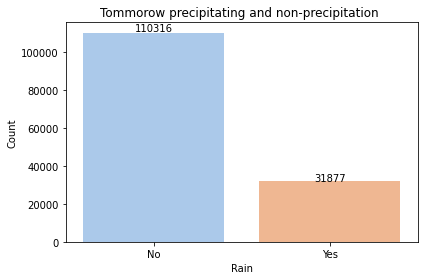

In [12]:
q = sns.countplot(x = data['RainTomorrow'], palette = 'pastel')
q.set(xlabel = 'Rain')
q.set(ylabel = 'Count')
q.set(title = 'Tommorow precipitating and non-precipitation ')
plt.tight_layout()
for p in q.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    q.annotate(f'{height}', (x + width/2, y + height*1.01), ha='center')

In [13]:
data['Date'].dtypes

dtype('O')

In [14]:
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [16]:
data.drop('Date', axis=1, inplace = True)

In [17]:
cat = [v for v in data.columns if data[v].dtype == 'O']
print('There are {} Categorical Variables:\n'.format(len(cat)))
print(cat)

There are 6 Categorical Variables:

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
data[cat].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [19]:
data = data[data['RainTomorrow'].notnull()]

In [20]:
data[cat].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [21]:
num =[v for v in data.columns if data[v].dtype !='O']
print(num)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [22]:
data[num].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [23]:
print(round(data[num].describe()),2) #Inspect for outliers

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

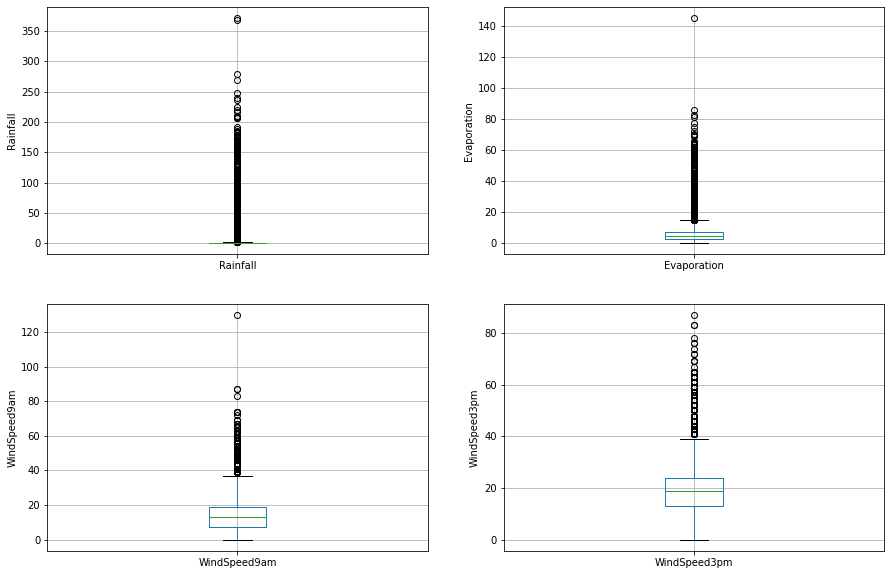

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
fig=data.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = data.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = data.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = data.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

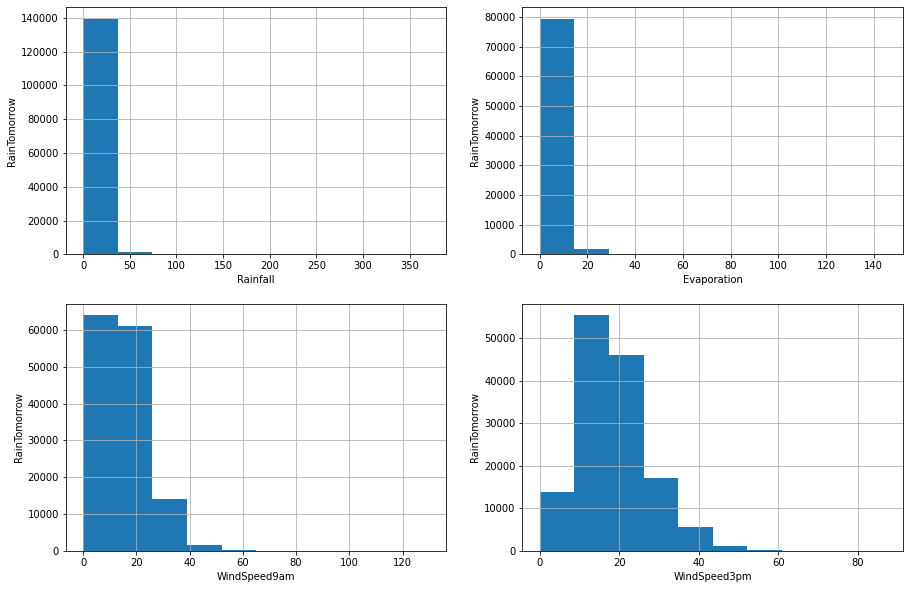

In [25]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = data.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = data.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = data.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = data.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [26]:
#Use interquantile range to find outliers
IQR = data.Rainfall.quantile(0.75) - data.Rainfall.quantile(0.25)
Lower_fence = data.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = data.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [27]:
IQR = data.Evaporation.quantile(0.75) - data.Evaporation.quantile(0.25)
Lower_fence = data.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = data.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [28]:
IQR = data.WindSpeed9am.quantile(0.75) - data.WindSpeed9am.quantile(0.25)
Lower_fence = data.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [29]:
# find outliers for WindSpeed3pm variable

IQR = data.WindSpeed3pm.quantile(0.75) - data.WindSpeed3pm.quantile(0.25)
Lower_fence = data.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = data.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [30]:
# Create features vector and target variable
X= data.drop(['RainTomorrow'], axis=1)
Y=data['RainTomorrow']

In [31]:
# Split the dataset into Trainig and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [33]:
cat = [v for v in X_train.columns if X_train[v].dtypes == 'O']
num = [v for v in X_train.columns if X_train[v].dtypes != 'O']


In [34]:
X_train[num].isnull().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
Year                 0
Month                0
Day                  0
dtype: int64

In [35]:
X_test[num].isnull().sum()

MinTemp            142
MaxTemp             58
Rainfall           267
Evaporation      12125
Sunshine         13502
WindGustSpeed     1903
WindSpeed9am       262
WindSpeed3pm       536
Humidity9am        325
Humidity3pm        720
Pressure9am       2802
Pressure3pm       2795
Cloud9am         10520
Cloud3pm         11326
Temp9am            164
Temp3pm            555
Year                 0
Month                0
Day                  0
dtype: int64

In [36]:
for col in num:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


In [37]:
# impute missing values in X_train and X_test with respective column median in X_train
for set in [X_train, X_test]:
    for col in num:
        col_median=X_train[col].median()
        set[col].fillna(col_median, inplace=True)  

In [38]:
X_train[num].isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [39]:
X_test[num].isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [40]:
X_train[cat].isnull().mean()


Location       0.000000
WindGustDir    0.065114
WindDir9am     0.070134
WindDir3pm     0.026443
RainToday      0.010013
dtype: float64

In [41]:
for col in cat:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [42]:
# Impute missing categorical variables with most frequent value

for set in [X_train, X_test]:
    set['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    set['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    set['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    set['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [43]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [44]:
# Replacing Outliers with Values found from IQR
def max_val(tset, var, maximum):
    return np.where(tset[var]>maximum, maximum, tset[var])

for tset in [X_train, X_test]:
    tset['Rainfall'] = max_val(tset, 'Rainfall', 3.2)
    tset['Evaporation'] = max_val(tset, 'Evaporation', 21.8)
    tset['WindSpeed9am'] = max_val(tset, 'WindSpeed9am', 55)
    tset['WindSpeed3pm'] = max_val(tset, 'WindSpeed3pm', 57)

In [45]:
cat

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [46]:
X_train[num].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [47]:
num2=X_train[num]


In [48]:
num2.drop("Year", axis=1, inplace = True)

In [49]:
num2.drop(["Day","Month"], axis=1, inplace = True)
num2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,1013.9,1013.4,5.0,5.0,18.8,20.4
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,1016.9,1013.1,7.0,5.0,26.4,27.5
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,1018.1,1013.6,1.0,1.0,28.5,35.0
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,1014.1,1010.8,2.0,3.0,27.3,29.4
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,1017.6,1015.2,5.0,8.0,22.2,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43204,9.4,17.6,0.0,4.8,8.5,35.0,7.0,17.0,62.0,80.0,1022.2,1019.9,6.0,8.0,16.3,16.2
100206,1.2,20.2,0.0,2.0,12.4,33.0,13.0,13.0,69.0,33.0,1022.0,1017.9,0.0,1.0,11.2,19.7
98494,11.9,17.6,1.2,2.0,8.5,39.0,13.0,20.0,67.0,38.0,1022.2,1022.8,5.0,5.0,14.5,17.1
120883,7.7,26.0,0.0,10.4,11.2,31.0,11.0,13.0,58.0,25.0,1025.5,1023.0,0.0,0.0,14.4,24.6


Text(69.0, 0.5, '')

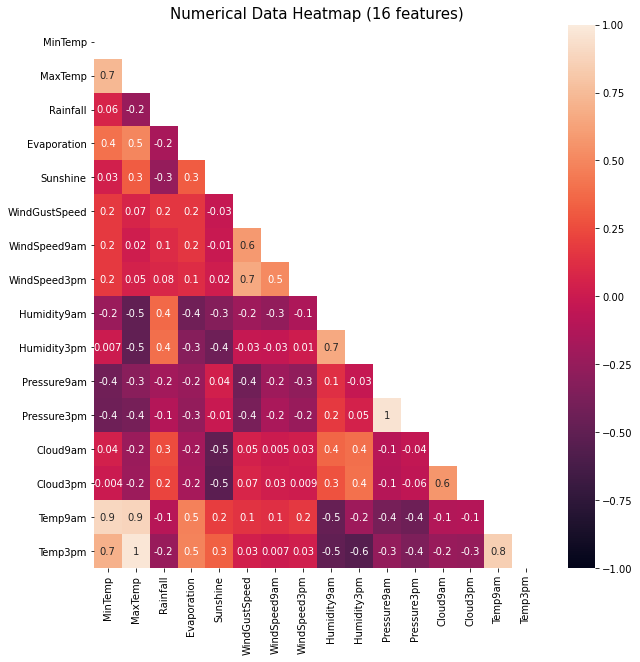

In [50]:
plt.figure(figsize = (10,10))
mask = np.triu(np.ones_like(num2.corr(), dtype=np.bool))
heatmap = sns.heatmap(num2.corr(), mask=mask, vmin=-1, vmax=1, annot=True,fmt='.1g')
plt.title('Numerical Data Heatmap (16 features)',fontsize=15)
plt.xlabel("")
plt.ylabel("")


In [51]:
#Encode categorical variables
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [52]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,1013.4,5.0,5.0,18.8,20.4,0,1,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16484,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,1015.2,5.0,8.0,22.2,27.0,0,1,2012,11,8


In [53]:
X_train['WindDir9am'] = '9pm' + X_train['WindDir9am'].astype(str)
X_train['WindDir3pm'] = '3pm' + X_train['WindDir3pm'].astype(str)

In [54]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
113462,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,9pmSSE,3pmS,...,1013.4,5.0,5.0,18.8,20.4,0,1,2014,4,25
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,9pmSSE,3pmSE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2015,11,2
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,9pmNE,3pmN,...,1013.6,1.0,1.0,28.5,35.0,0,1,2014,10,19
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,9pmSSE,3pmE,...,1010.8,2.0,3.0,27.3,29.4,0,1,2010,10,30
16484,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,9pmN,3pmSE,...,1015.2,5.0,8.0,22.2,27.0,0,1,2012,11,8


In [55]:
X_train = pd.concat([X_train[num], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [56]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,3pmNNW,3pmNW,3pmS,3pmSE,3pmSSE,3pmSSW,3pmSW,3pmW,3pmWNW,3pmWSW
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,1,0,0,0,0,0,0,0
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,1,0,0,0,0,0,0
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
# Check for duplicate columns if any
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [58]:
X_test['WindDir9am'] = '9pm' + X_test['WindDir9am'].astype(str)
X_test['WindDir3pm'] = '3pm' + X_test['WindDir3pm'].astype(str)

In [59]:
X_test = pd.concat([X_test[num], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [60]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,3pmNNW,3pmNW,3pmS,3pmSE,3pmSSE,3pmSSW,3pmSW,3pmW,3pmWNW,3pmWSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
#Feature Scaling 
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,3pmNNW,3pmNW,3pmS,3pmSE,3pmSSE,3pmSSW,3pmSW,3pmW,3pmWNW,3pmWSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


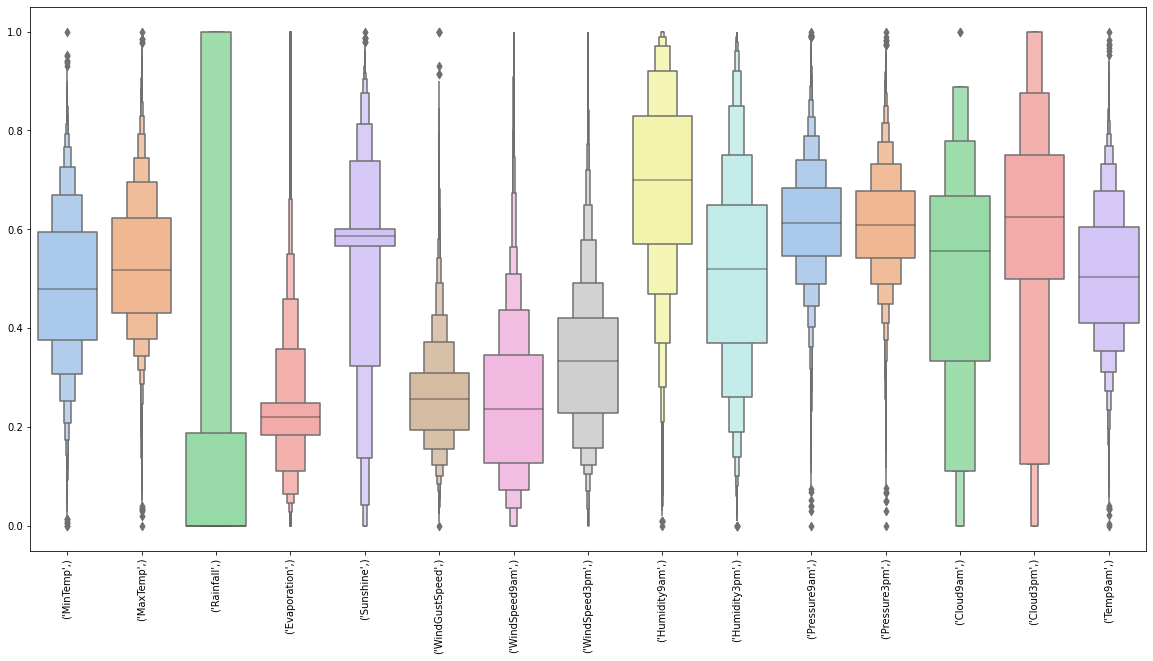

In [63]:
plt.figure(figsize = (20,10))
sns.boxenplot(data = X_train.iloc[0:113749,0:15], palette = 'pastel')
plt.xticks(rotation = 90)
plt.show()

In [164]:
aclist =[]
f1list=[]
cklist=[]

In [64]:
# Train a logistic regression model on the training set
t0=time.time()
lreg = LogisticRegression(solver='liblinear', random_state=0)
lreg.fit(X_train, Y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_lr = lreg.predict(X_test)
acs_lr=accuracy_score(Y_test, Y_pred_test_lr)
f1_lr=f1_score(Y_test, Y_pred_test_lr,pos_label="Yes")
ck_lr=cohen_kappa_score(Y_test, Y_pred_test_lr)
print('Logestic Regression Model accuracy score: is {0:0.4f}'. format(acs_lr))
print("F1 score for logistic regression is: {0:0.4f} ". format(f1_lr))
print("Cohen Kappa score for logistic regression is: {0:0.4f} ". format(ck_lr))


Time taken : 1.6418190002441406
Logestic Regression Model accuracy score: is 0.8502
F1 score for logistic regression is: 0.6067 
Cohen Kappa score for logistic regression is: 0.5177 


In [165]:
aclist.append(acs_lr)
f1list.append(f1_lr)
cklist.append(ck_lr)

<AxesSubplot:>

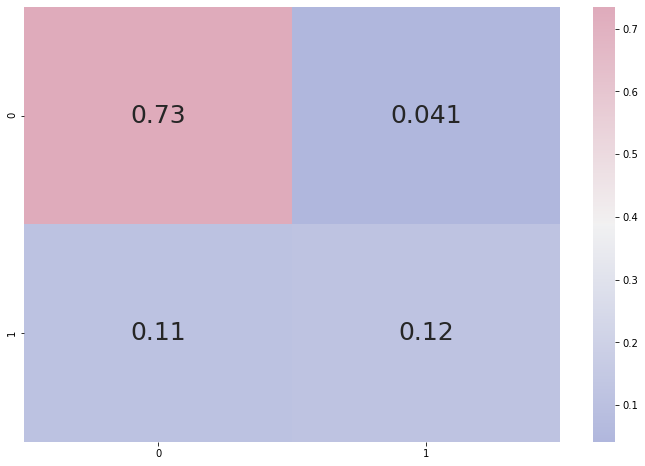

In [65]:
# Logistic regression confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test,Y_pred_test_lr)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [66]:
# Gradient Boosting Calssifer- Fit model no training data
t0=time.time()
XGBmodel = XGBClassifier(objective='binary:logistic',eta ='0.25',max_depth ='16',n_estimators=500)
XGBmodel.fit(X_train, Y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_XGB = XGBmodel.predict(X_test)

acs_xb=accuracy_score(Y_test, Y_pred_test_XGB)
f1_xb=f1_score(Y_test, Y_pred_test_XGB,pos_label="Yes")
ck_xb=cohen_kappa_score(Y_test, Y_pred_test_XGB)
print('Gradient Boosing Model accuracy score is {0:0.4f}'. format(acs_xb))
print("F1 score for Gradient Boosing Model is {0:0.4f}". format(f1_xb))
print("Cohen Kappa score for Gradient Boosing Model is {0:0.4f}". format(ck_xb))

Time taken : 638.8185906410217
Gradient Boosing Model accuracy score is 0.8679
F1 score for Gradient Boosing Model is 0.6636
Cohen Kappa score for Gradient Boosing Model is 0.5834


In [166]:
aclist.append(acs_xb)
f1list.append(f1_xb)
cklist.append(ck_xb)

<AxesSubplot:>

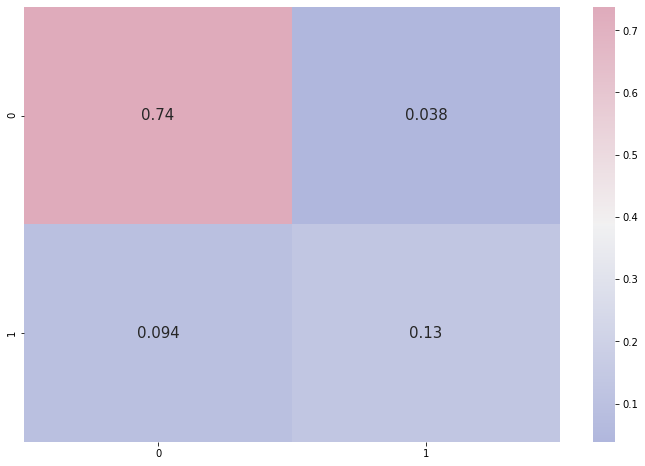

In [67]:
# Gradient Boosting confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test,Y_pred_test_XGB)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [123]:
# Bernoulli Naive Bayes Model
t0=time.time()
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, Y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_BNB = BNBmodel.predict(X_test)

acs_bnb=accuracy_score(Y_test, Y_pred_test_BNB)
f1_bnb=f1_score(Y_test, Y_pred_test_BNB,pos_label="Yes")
ck_bnb=cohen_kappa_score(Y_test, Y_pred_test_BNB)
print('BernoulliNBModel accuracy score is {0:0.4f}'. format(acs_bnb))
print("F1 score for BernoulliNBModel is {0:0.4f}". format(f1_bnb))
print("Cohen Kappa score for BernoulliNB Model is {0:0.4f}". format(ck_bnb))

Time taken : 0.701352596282959
BernoulliNBModel accuracy score is 0.7635
F1 score for BernoulliNBModel is 0.4769
Cohen Kappa score for BernoulliNB Model is 0.3241


In [167]:
aclist.append(acs_bnb)
f1list.append(f1_bnb)
cklist.append(ck_bnb)

<AxesSubplot:>

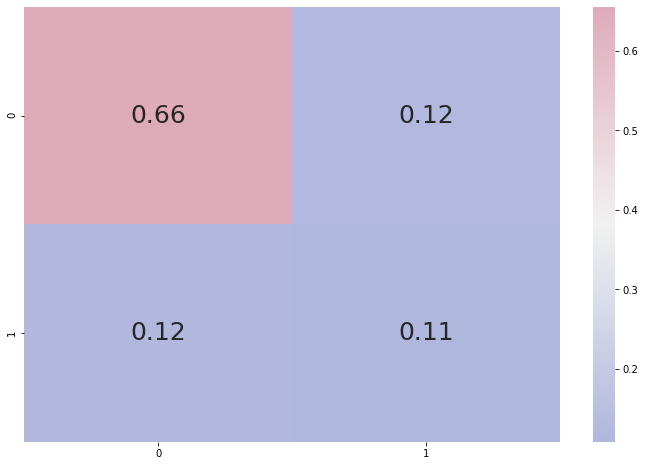

In [69]:
# Bernoulli Naive Bayes confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test,Y_pred_test_BNB )
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [125]:
# Gaussian Naive Bayes Model
t0=time.time()
GNBmodel = GaussianNB()
GNBmodel.fit(X_train, Y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_GNB = GNBmodel.predict(X_test)

acs_gnb=accuracy_score(Y_test, Y_pred_test_GNB)
f1_gnb=f1_score(Y_test, Y_pred_test_GNB,pos_label="Yes")
ck_gnb=cohen_kappa_score(Y_test, Y_pred_test_GNB)
print('GaussianNB accuracy score is {0:0.4f}'. format(acs_gnb))
print("F1 score for GaussianNB is {0:0.4f}". format(f1_gnb))
print("Cohen Kappa score for GaussianNB Model is {0:0.4f}". format(ck_gnb))

Time taken : 0.4830460548400879
GaussianNB accuracy score is 0.6511
F1 score for GaussianNB is 0.4856
Cohen Kappa score for GaussianNB Model is 0.2651


In [168]:
aclist.append(acs_gnb)
f1list.append(f1_gnb)
cklist.append(ck_gnb)

<AxesSubplot:>

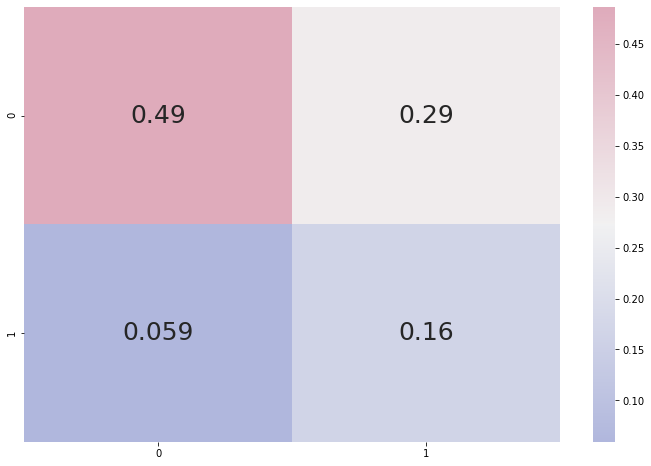

In [71]:
# Gaussian Naive Bayes confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test,Y_pred_test_GNB)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [72]:
le = preprocessing.LabelEncoder()
Y_train_0_1  = le.fit_transform(Y_train)
Y_test_0_1 = le.fit_transform(Y_test)

In [74]:
# Random Forest Regressor
t0=time.time()
RFRmodel = RandomForestRegressor(n_estimators = 100, random_state = 0)  
RFRmodel.fit(X_train, Y_train_0_1)  
print('Time taken :' , time.time()-t0)
Y_pred_test_RFR = RFRmodel.predict(X_test)
                                                                  
acs_rfr=accuracy_score(Y_test_0_1, np.round(Y_pred_test_RFR,0))
f1_rfr=f1_score(Y_test_0_1, np.round(Y_pred_test_RFR,0),)
ck_rfr=cohen_kappa_score(Y_test_0_1, np.round(Y_pred_test_RFR,0))
print('Random Forest Regressor accuracy score is {0:0.4f}'. format(acs_rfr))
print("F1 score for Random Forest Regressor is {0:0.4f}". format(f1_rfr))
print("Cohen Kappa score for Random Forest Regressor Model is {0:0.4f}". format(ck_rfr))

Time taken : 186.1872375011444
Random Forest Regressor accuracy score is 0.8587
F1 score for Random Forest Regressor is 0.6269
Cohen Kappa score for Random Forest Regressor Model is 0.5434


In [169]:
aclist.append(acs_rfr)
f1list.append(f1_rfr)
cklist.append(ck_rfr)

<AxesSubplot:>

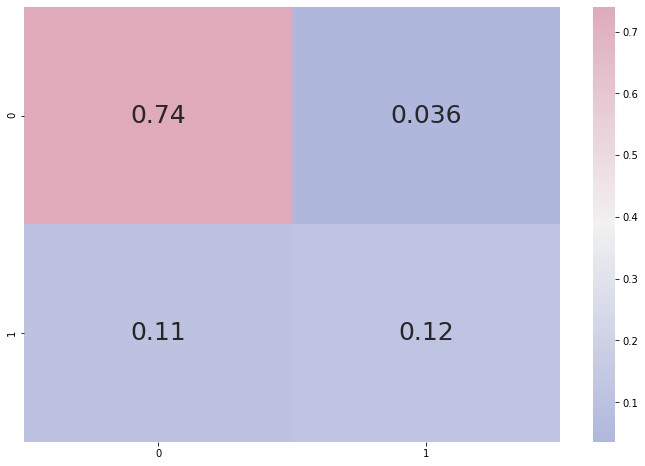

In [75]:
# Random Forest Regressor confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test_0_1,np.round(Y_pred_test_RFR,0))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [77]:
# Random Forest Classifier Model
t0=time.time()
RFCmodel = RandomForestClassifier(n_estimators=150, max_depth=5,random_state=0)
RFCmodel.fit(X_train,Y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_RFC = RFCmodel.predict(X_test)

acs_rfc=accuracy_score(Y_test, Y_pred_test_RFC)
f1_rfc=f1_score(Y_test, Y_pred_test_RFC,pos_label="Yes")
ck_rfc=cohen_kappa_score(Y_test, Y_pred_test_RFC)
print('Random Forest Regressor accuracy score is {0:0.4f}'. format(acs_rfc))
print("F1 score for Random Forest Regressor is {0:0.4f}". format(f1_rfc))
print("Cohen Kappa score for Random Forest Regressor Model is {0:0.4f}". format(ck_rfc))

Time taken : 8.334259748458862
Random Forest Regressor accuracy score is 0.8227
F1 score for Random Forest Regressor is 0.3975
Cohen Kappa score for Random Forest Regressor Model is 0.3254


In [170]:
aclist.append(acs_rfc)
f1list.append(f1_rfc)
cklist.append(ck_rfc)

<AxesSubplot:>

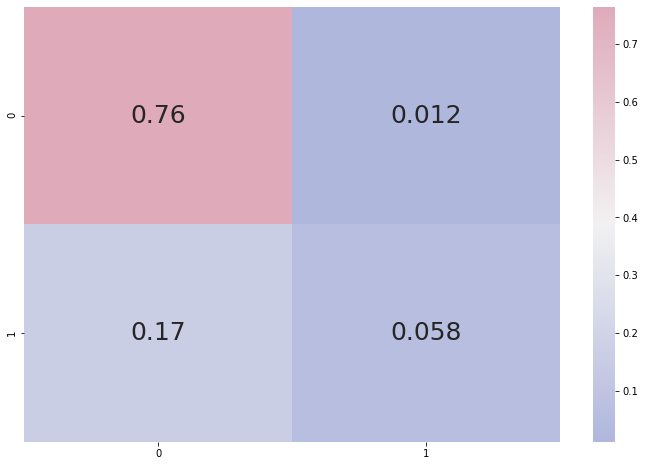

In [78]:
# Random Forest Classifier confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test,Y_pred_test_RFC)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [79]:
#Suppor Vector Machine Model
t0=time.time()
SVMmodel = svm.SVC(kernel='linear')
SVMmodel.fit(X_train,Y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_SVM = SVMmodel.predict(X_test)

acs_svm=accuracy_score(Y_test, Y_pred_test_SVM)
f1_svm=f1_score(Y_test, Y_pred_test_SVM,pos_label="Yes")
ck_svm=cohen_kappa_score(Y_test, Y_pred_test_SVM)
print('SVM accuracy score is {0:0.4f}'. format(acs_svm))
print("F1 score for SVM is {0:0.4f}". format(f1_svm))
print("Cohen Kappa score for SVM Model is {0:0.4f}". format(ck_svm))

Time taken : 1660.7070891857147
SVM accuracy score is 0.8505
F1 score for SVM is 0.5939
Cohen Kappa score for SVM Model is 0.5075


In [171]:
aclist.append(acs_svm)
f1list.append(f1_svm)
cklist.append(ck_svm)

<AxesSubplot:>

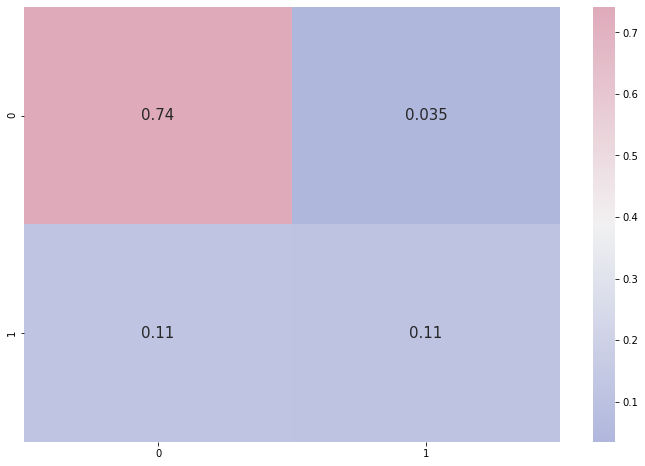

In [80]:
# SVM confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test,Y_pred_test_SVM)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})


In [81]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, #minimum amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
NNmodel = Sequential()

# Layers
NNmodel.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 118))
NNmodel.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
NNmodel.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
NNmodel.add(Dropout(0.25))
NNmodel.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
NNmodel.add(Dropout(0.5))
NNmodel.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
NNmodel.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [82]:
X_train.shape

(113754, 118)

In [83]:
t0=time.time()
history = NNmodel.fit(X_train, Y_train_0_1, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)
print('Time taken :' , time.time()-t0)

Epoch 1/150
2844/2844 [==============================] - 7s 2ms/step - loss: 0.5889 - accuracy: 0.7756 - val_loss: 0.4498 - val_accuracy: 0.7763
Epoch 2/150
2844/2844 [==============================] - 6s 2ms/step - loss: 0.4627 - accuracy: 0.7761 - val_loss: 0.4069 - val_accuracy: 0.7763
Epoch 3/150
2844/2844 [==============================] - 6s 2ms/step - loss: 0.4316 - accuracy: 0.7883 - val_loss: 0.3914 - val_accuracy: 0.8346
Epoch 4/150
2844/2844 [==============================] - 6s 2ms/step - loss: 0.4168 - accuracy: 0.8031 - val_loss: 0.3833 - val_accuracy: 0.8391
Epoch 5/150
2844/2844 [==============================] - 6s 2ms/step - loss: 0.4086 - accuracy: 0.8041 - val_loss: 0.3775 - val_accuracy: 0.8412
Epoch 6/150
2844/2844 [==============================] - 6s 2ms/step - loss: 0.4001 - accuracy: 0.8068 - val_loss: 0.3734 - val_accuracy: 0.8411
Epoch 7/150
2844/2844 [==============================] - 6s 2ms/step - loss: 0.3989 - accuracy: 0.8073 - val_loss: 0.3710 - val_ac

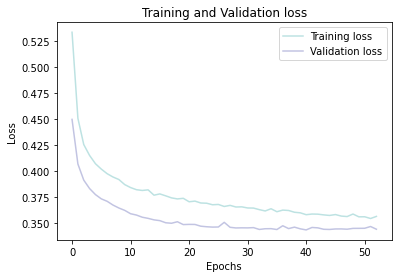

In [84]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

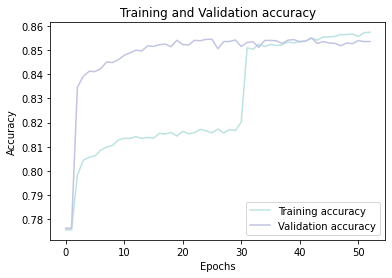

In [85]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
Y_pred_test_NN = NNmodel.predict(X_test)

<AxesSubplot:>

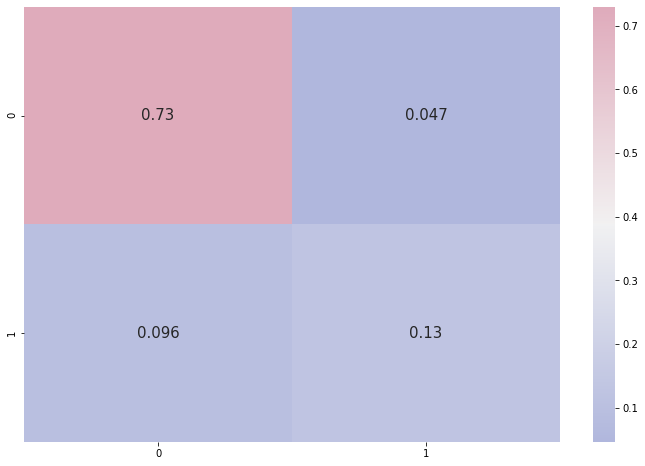

In [87]:
# NN confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test_0_1,np.round(Y_pred_test_NN,0))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [88]:
print(classification_report(Y_test_0_1, np.round(Y_pred_test_NN,0)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22067
           1       0.73      0.57      0.64      6372

    accuracy                           0.86     28439
   macro avg       0.81      0.76      0.78     28439
weighted avg       0.85      0.86      0.85     28439



In [89]:
acs_nn=accuracy_score(Y_test_0_1,np.round(Y_pred_test_NN,0))
f1_nn=f1_score(Y_test_0_1, np.round(Y_pred_test_NN,0),)
ck_nn=cohen_kappa_score(Y_test_0_1, np.round(Y_pred_test_NN,0))
print('NN Model  accuracy score is {0:0.4f}'. format(acs_nn))
print("F1 score for NN Model is {0:0.4f}". format(f1_nn))
print("Cohen Kappa score for NN Model  is {0:0.4f}". format(ck_nn))

NN Model  accuracy score is 0.8577
F1 score for NN Model is 0.6434
Cohen Kappa score for NN Model  is 0.5562


In [172]:
aclist.append(acs_nn)
f1list.append(f1_nn)
cklist.append(ck_nn)

In [90]:

params_cb ={'iterations': 50,
            'max_depth': 16}
t0=time.time()
model_cb = cb.CatBoostClassifier(**params_cb)
model_cb.fit(X_train,Y_train)
print('Time taken :' , time.time()-t0)
Y_pred_test_CBOOST = model_cb.predict(X_test)

print('Cat Boost Model accuracy score is {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_test_CBOOST)))

acs_cb=accuracy_score(Y_test,Y_pred_test_CBOOST)
f1_cb=f1_score(Y_test, Y_pred_test_CBOOST,pos_label="Yes")
ck_cb=cohen_kappa_score(Y_test, Y_pred_test_CBOOST)
print('CB Model  accuracy score is {0:0.4f}'. format(acs_cb))
print("F1 score for CB Model is {0:0.4f}". format(f1_cb))
print("Cohen Kappa score for CB Model  is {0:0.4f}". format(ck_cb))

Learning rate set to 0.5
0:	learn: 0.4156320	total: 3.04s	remaining: 2m 29s
1:	learn: 0.3396715	total: 6.19s	remaining: 2m 28s
2:	learn: 0.3108002	total: 9.32s	remaining: 2m 25s
3:	learn: 0.2964252	total: 12.6s	remaining: 2m 25s
4:	learn: 0.2798230	total: 15.7s	remaining: 2m 21s
5:	learn: 0.2711716	total: 18.8s	remaining: 2m 18s
6:	learn: 0.2536914	total: 22.2s	remaining: 2m 16s
7:	learn: 0.2443716	total: 25.4s	remaining: 2m 13s
8:	learn: 0.2348222	total: 28.8s	remaining: 2m 10s
9:	learn: 0.2268653	total: 32.2s	remaining: 2m 8s
10:	learn: 0.2200568	total: 35.6s	remaining: 2m 6s
11:	learn: 0.2076248	total: 39.1s	remaining: 2m 3s
12:	learn: 0.2017805	total: 43s	remaining: 2m 2s
13:	learn: 0.1940050	total: 46.6s	remaining: 1m 59s
14:	learn: 0.1859581	total: 50.1s	remaining: 1m 56s
15:	learn: 0.1779981	total: 53.4s	remaining: 1m 53s
16:	learn: 0.1744344	total: 56.8s	remaining: 1m 50s
17:	learn: 0.1682608	total: 1m	remaining: 1m 47s
18:	learn: 0.1581309	total: 1m 3s	remaining: 1m 43s
19:	le

In [173]:
aclist.append(acs_cb)
f1list.append(f1_cb)
cklist.append(ck_cb)

<AxesSubplot:>

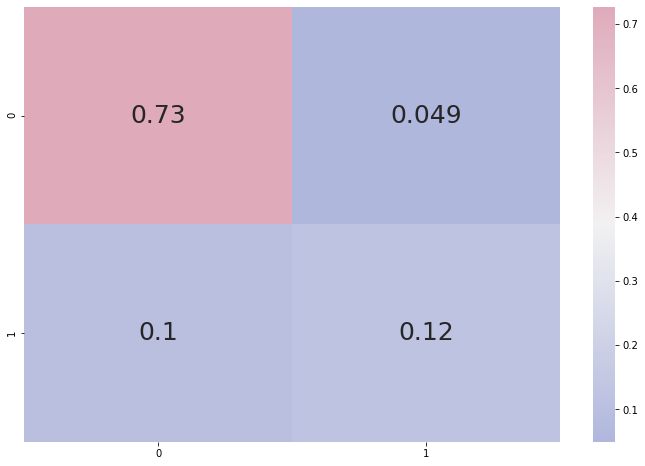

In [91]:
# Cat Boost confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50,l=75,n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test,Y_pred_test_CBOOST)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})

In [92]:
kappa_scorer = make_scorer(cohen_kappa_score)

scoring = {'acc': 'accuracy',
           'cohen_kappa': kappa_scorer}

In [93]:
lregscores=cross_validate(lreg,X_train,Y_train,cv=5,scoring=scoring)
print("Corss-vallidation scores for Logistic Regression model:{}".format(lregscores))
print("Mean accuracuy cross-validation score for Logistic Regression: {:.4f}".format(lregscores["test_acc"].mean()))
print("Mean cohen kappa cross-validation score for Logistic Regression: {:.4f}".format(lregscores["test_cohen_kappa"].mean()))

Corss-vallidation scores for Logistic Regression model:{'fit_time': array([2.23629928, 2.22450709, 2.23787427, 2.43994331, 2.34749031]), 'score_time': array([0.29319477, 0.35131025, 0.34846473, 0.33257723, 0.33826208]), 'test_acc': array([0.84686387, 0.84624852, 0.84633642, 0.84963298, 0.84773626]), 'test_cohen_kappa': array([0.5087946 , 0.50443136, 0.50409467, 0.51408706, 0.51000911])}
Mean accuracuy cross-validation score for Logistic Regression: 0.8474
Mean cohen kappa cross-validation score for Logistic Regression: 0.5083


In [95]:
xgbscores=cross_validate(XGBmodel,X_train,Y_train,cv=5,scoring=scoring)
print("Corss-vallidation scores for XGboost:{}".format(xgbscores))
print("Mean accuracuy cross-validation score for XGboost: {:.4f}".format(xgbscores["test_acc"].mean()))
print("Mean cohen kappa cross-validation score for XGboost: {:.4f}".format(xgbscores["test_cohen_kappa"].mean()))

Corss-vallidation scores for XGboost:{'fit_time': array([564.7874763 , 565.4431076 , 552.40778852, 569.7870512 ,
       562.812186  ]), 'score_time': array([3.27343392, 4.30545473, 3.19017744, 3.76284933, 3.37657309]), 'test_acc': array([0.86374225, 0.862072  , 0.86150059, 0.86237968, 0.86698901]), 'test_cohen_kappa': array([0.56644086, 0.56455261, 0.5631833 , 0.56608857, 0.58021852])}
Mean accuracuy cross-validation score for XGboost: 0.8633
Mean cohen kappa cross-validation score for XGboost: 0.5681


In [96]:
bnbscores=cross_validate(BNBmodel,X_train.values,Y_train.values,cv=5,scoring=scoring, return_train_score=True)
print("Corss-vallidation scores for Beruli Naive Bayes:{}".format(bnbscores))
print("Mean cross-validation score for Bernuli Naive Bayes: {:.4f}".format(bnbscores["test_acc"].mean()))
print("Mean cohen kappa cross-validation score for Naive Bayes: {:.4f}".format(bnbscores["test_cohen_kappa"].mean()))

Corss-vallidation scores for Beruli Naive Bayes:{'fit_time': array([0.47247267, 0.49603271, 0.45305347, 0.55089211, 0.48738217]), 'score_time': array([0.3630898 , 0.44829869, 0.4732635 , 0.41226459, 0.33225489]), 'test_acc': array([0.75996659, 0.76255989, 0.76154894, 0.76721902, 0.76123077]), 'train_acc': array([0.76326055, 0.76272211, 0.76283199, 0.76152435, 0.76263681]), 'test_cohen_kappa': array([0.30841974, 0.32049558, 0.31850086, 0.33151   , 0.32132768]), 'train_cohen_kappa': array([0.32278793, 0.32121236, 0.32030104, 0.31758473, 0.32046818])}
Mean cross-validation score for Bernuli Naive Bayes: 0.7625
Mean cohen kappa cross-validation score for Naive Bayes: 0.3201


In [99]:
gnbscores=cross_validate(GNBmodel,X_train,Y_train,cv=5,scoring=scoring)
print("Corss-vallidation scores for Gaussian Naive Bayes:{}".format(gnbscores))
print("Mean accuracuy cross-validation score for Gaussian Navive Bayes: {:.4f}".format(gnbscores["test_acc"].mean()))
print("Mean cross-validation score for Gaussian Navive Bayes: {:.4f}".format(gnbscores["test_acc"].mean()))
print("Mean cohen kappa cross-validation score for Gaussian Navive Bayes: {:.4f}".format(gnbscores["test_cohen_kappa"].mean()))

Corss-vallidation scores for Gaussian Naive Bayes:{'fit_time': array([0.45943403, 0.49515176, 0.44510007, 0.48368311, 0.46018076]), 'score_time': array([0.12822962, 0.14063382, 0.13431478, 0.14459896, 0.1532166 ]), 'test_acc': array([0.64379588, 0.64287284, 0.65500418, 0.64480682, 0.64584615]), 'test_cohen_kappa': array([0.25165016, 0.2482943 , 0.26942993, 0.25228877, 0.25258813])}
Mean accuracuy cross-validation score for Gaussian Navive Bayes: 0.6465
Mean cross-validation score for Gaussian Navive Bayes: 0.6465
Mean cohen kappa cross-validation score for Gaussian Navive Bayes: 0.2549


In [100]:
rfrscores=cross_validate(RFRmodel,X_train,Y_train_0_1,cv=5,scoring=scoring)
print("Corss-vallidation scores for Random Forest Regressor:{}".format(rfrscores))
print("Mean cross-validation score for Random Forest Regressor: {:.4f}".format(rfrscores["test_acc"].mean()))
print("Mean cohen kappa cross-validation score for Random Forest Regressor: {:.4f}".format(rfrscores["test_cohen_kappa"].mean()))

Corss-vallidation scores for Random Forest Regressor:{'fit_time': array([153.74710298, 149.71659303, 154.07090735, 164.73782873,
       163.92927694]), 'score_time': array([0.50242853, 0.50631356, 0.52263737, 0.61504817, 0.65453029]), 'test_acc': array([nan, nan, nan, nan, nan]), 'test_cohen_kappa': array([nan, nan, nan, nan, nan])}
Mean cross-validation score for Random Forest Regressor: nan
Mean cohen kappa cross-validation score for Random Forest Regressor: nan


In [101]:
rfcscores=cross_validate(RFCmodel,X_train,Y_train,cv=5,scoring=scoring)
print("Corss-vallidation scores for Random Forest Classifier:{}".format(rfcscores))
print("Mean accuracuy cross-validation score for Random Forest Classifier: {:.4f}".format(rfcscores["test_acc"].mean()))
print("Mean cohen kappa cross-validation score for Random Forest Classifier: {:.4f}".format(rfcscores["test_cohen_kappa"].mean()))

Corss-vallidation scores for Random Forest Classifier:{'fit_time': array([7.30866885, 7.24420857, 7.59902906, 7.47861052, 7.46855426]), 'score_time': array([0.35246134, 0.31511903, 0.34846568, 0.34149814, 0.3130002 ]), 'test_acc': array([0.81987605, 0.82013977, 0.82009582, 0.82035954, 0.82404396]), 'test_cohen_kappa': array([0.31060773, 0.31441618, 0.3134238 , 0.31239442, 0.33160932])}
Mean accuracuy cross-validation score for Random Forest Classifier: 0.8209
Mean cohen kappa cross-validation score for Random Forest Classifier: 0.3165


In [97]:
svmscores=cross_validate(SVMmodel,X_train,Y_train,cv=5,scoring=scoring)
print("Corss-vallidation scores for SVM:{}".format(svmscores))
print("Mean accuracuy cross-validation score for SVM: {:.4f}".format(svmscores["test_acc"].mean()))
print("Mean cohen kappa cross-validation score for SVM: {:.4f}".format(svmscores["test_cohen_kappa"].mean()))

Corss-vallidation scores for SVM:{'fit_time': array([ 992.89647627, 1010.62539482,  966.18890166, 1122.86800194,
       1049.45700693]), 'score_time': array([67.53274488, 65.92109871, 76.0853076 , 76.77732158, 85.09073329]), 'test_acc': array([0.84756714, 0.84686387, 0.84422663, 0.84919344, 0.84764835]), 'test_cohen_kappa': array([0.49953014, 0.49658002, 0.48594374, 0.50261292, 0.49941559])}
Mean accuracuy cross-validation score for SVM: 0.8471
Mean cohen kappa cross-validation score for SVM: 0.4968


In [102]:
nnscores=cross_validate(NNmodel,X_train,Y_train_0_1,cv=5,scoring=scoring)
print("Corss-vallidation scores for Neural Networks:{}".format(nnscores))
print("Mean accuracuy cross-validation score for Neural Networks: {:.4f}".format(nnscores["test_acc"].mean()))
print("Mean cohen kappa cross-validation score for Neural Networks: {:.4f}".format(nnscores["test_cohen_kappa"].mean()))

TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc67b810278>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [98]:
cbscores=cross_validate(model_cb,X_train,Y_train,cv=5,scoring=scoring)
print("Corss-vallidation scores for Cat boost:{}".format(cbscores))
print("Mean accuracuy cross-validation score for CatBoost: {:.4f}".format(cbscores["test_acc"].mean()))
print("Mean cohen kappa cross-validation score for CatBoost: {:.4f}".format(xgbscores["test_cohen_kappa"].mean()))

Learning rate set to 0.5
0:	learn: 0.4220176	total: 3.39s	remaining: 2m 46s
1:	learn: 0.3395678	total: 6.72s	remaining: 2m 41s
2:	learn: 0.3013736	total: 10.2s	remaining: 2m 40s
3:	learn: 0.2887865	total: 13.7s	remaining: 2m 37s
4:	learn: 0.2715159	total: 17.2s	remaining: 2m 34s
5:	learn: 0.2536162	total: 20.6s	remaining: 2m 31s
6:	learn: 0.2436285	total: 24.1s	remaining: 2m 28s
7:	learn: 0.2354606	total: 27.5s	remaining: 2m 24s
8:	learn: 0.2229338	total: 31s	remaining: 2m 21s
9:	learn: 0.2128845	total: 34.2s	remaining: 2m 16s
10:	learn: 0.2082225	total: 37.4s	remaining: 2m 12s
11:	learn: 0.1965758	total: 40.9s	remaining: 2m 9s
12:	learn: 0.1877906	total: 44.3s	remaining: 2m 5s
13:	learn: 0.1834421	total: 47.5s	remaining: 2m 2s
14:	learn: 0.1757921	total: 50.7s	remaining: 1m 58s
15:	learn: 0.1676494	total: 53.9s	remaining: 1m 54s
16:	learn: 0.1629525	total: 57.4s	remaining: 1m 51s
17:	learn: 0.1590837	total: 1m	remaining: 1m 48s
18:	learn: 0.1541282	total: 1m 4s	remaining: 1m 44s
19:	l

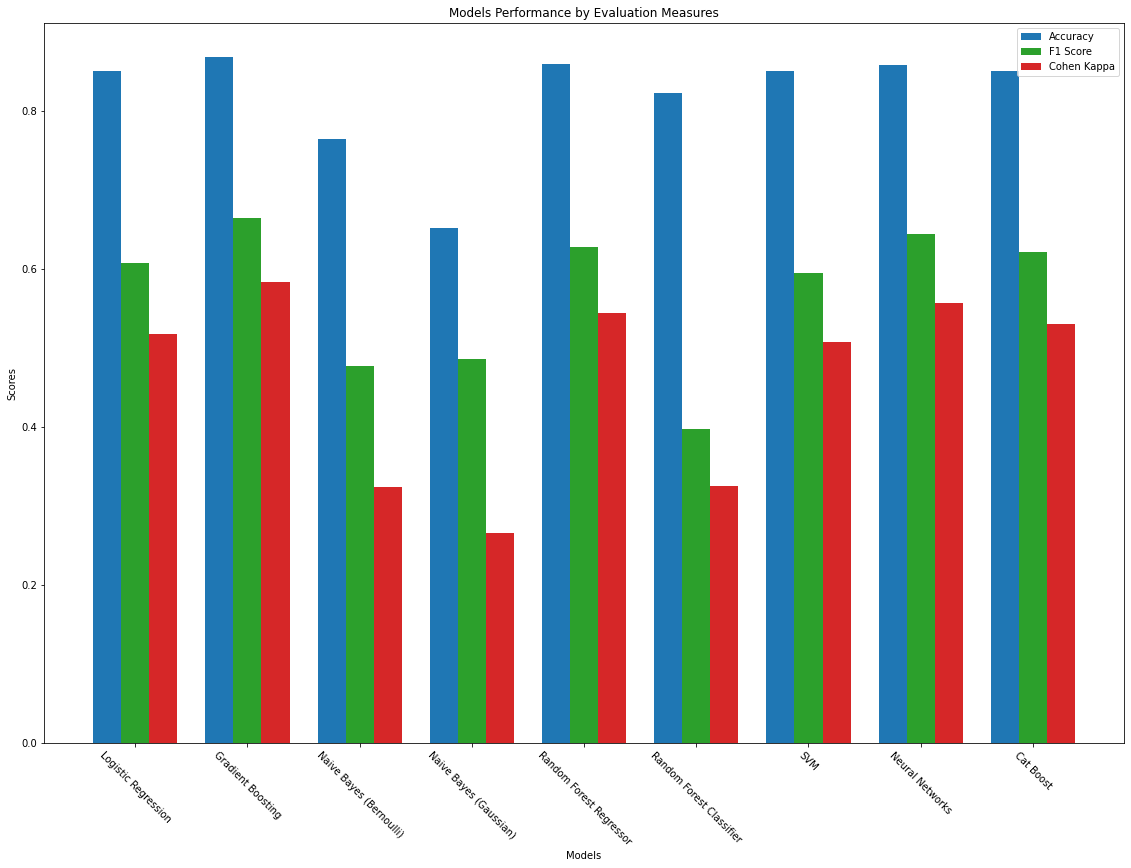

In [209]:
data = [aclist,
        f1list,
        cklist]
labels = ['Logistic Regression', 'Gradient Boosting', 'Naive Bayes (Bernoulli)', 'Naive Bayes (Gaussian)', 'Random Forest Regressor'
         , 'Random Forest Classifier', 'SVM', 'Neural Networks','Cat Boost']

X = np.arange(len(labels))
ind = range(2, len(labels))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects1 = ax.bar(X - 0.25, data[0], color = 'tab:blue', width = 0.25, align="center")
rects2 = ax.bar(X + 0.00, data[1], color = 'tab:green', width = 0.25, align="center")
rects3 = ax.bar(X + 0.25, data[2], color = 'tab:red', width = 0.25, align="center")
ax.legend(labels=["Accuracy",'F1 Score','Cohen Kappa'], fontsize='medium')
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('Models Performance by Evaluation Measures')

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)

ax.set_xticks(X)
ax.set_xticklabels(labels,rotation=-45)

fig.set_size_inches(15, 10)


In [211]:
tlist=[1.64,638.82,0.57,0.32,186.19,8.33,1660.7,1031.64,175.55]

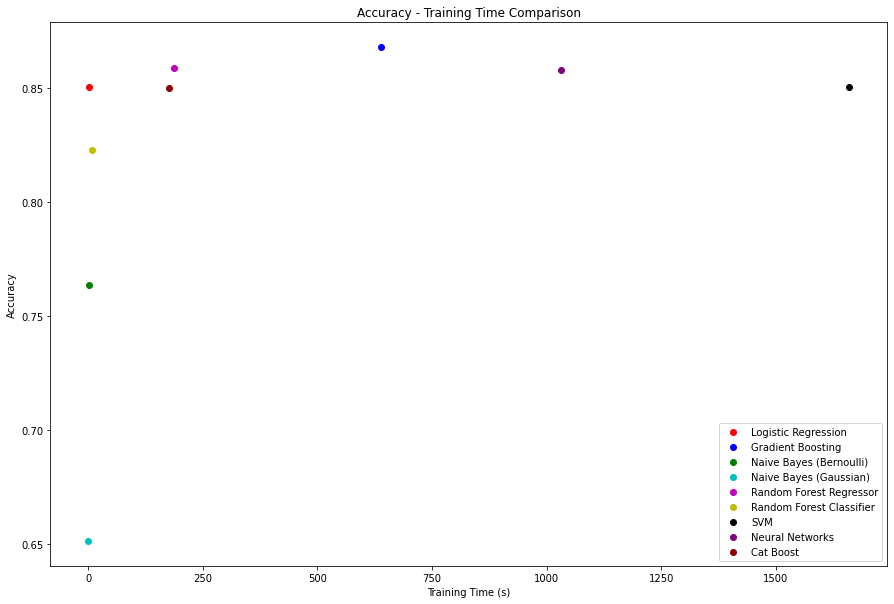

In [231]:
x1 = tlist[0]
y1 = aclist[0]
x2 = tlist[1]
y2 = aclist[1]
x3 = tlist[2]
y3 = aclist[2]
x4 = tlist[3]
y4 = aclist[3]
x5 = tlist[4]
y5 = aclist[4]
x6 = tlist[5]
y6 = aclist[5]
x7 = tlist[6]
y7 = aclist[6]
x8 = tlist[7]
y8 = aclist[7]
x9 = tlist[8]
y9 = aclist[8]

plt.scatter(x1,y1, label=labels[0],color='r')
plt.scatter(x2,y2,label=labels[1],color='b')
plt.scatter(x3,y3,label=labels[2],color='g')
plt.scatter(x4,y4,label=labels[3],color='c')
plt.scatter(x5,y5,label=labels[4],color='m')
plt.scatter(x6,y6,label=labels[5],color='y')
plt.scatter(x7,y7,label=labels[6],color='k')
plt.scatter(x8,y8,label=labels[7],color='purple')
plt.scatter(x9,y9,label=labels[8],color='darkred')


plt.title('Accuracy - Training Time Comparison')
plt.xlabel('Training Time (s)')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams["figure.figsize"]=(15,10)

plt.show()

In [232]:
fivefoldaclist=[.8474,.8633,.7625,.6465,.8209,.8471,.8437]
fivefoldcklist=[.5083,.5681,.3201,.2449,.3165,.4968,.5681]

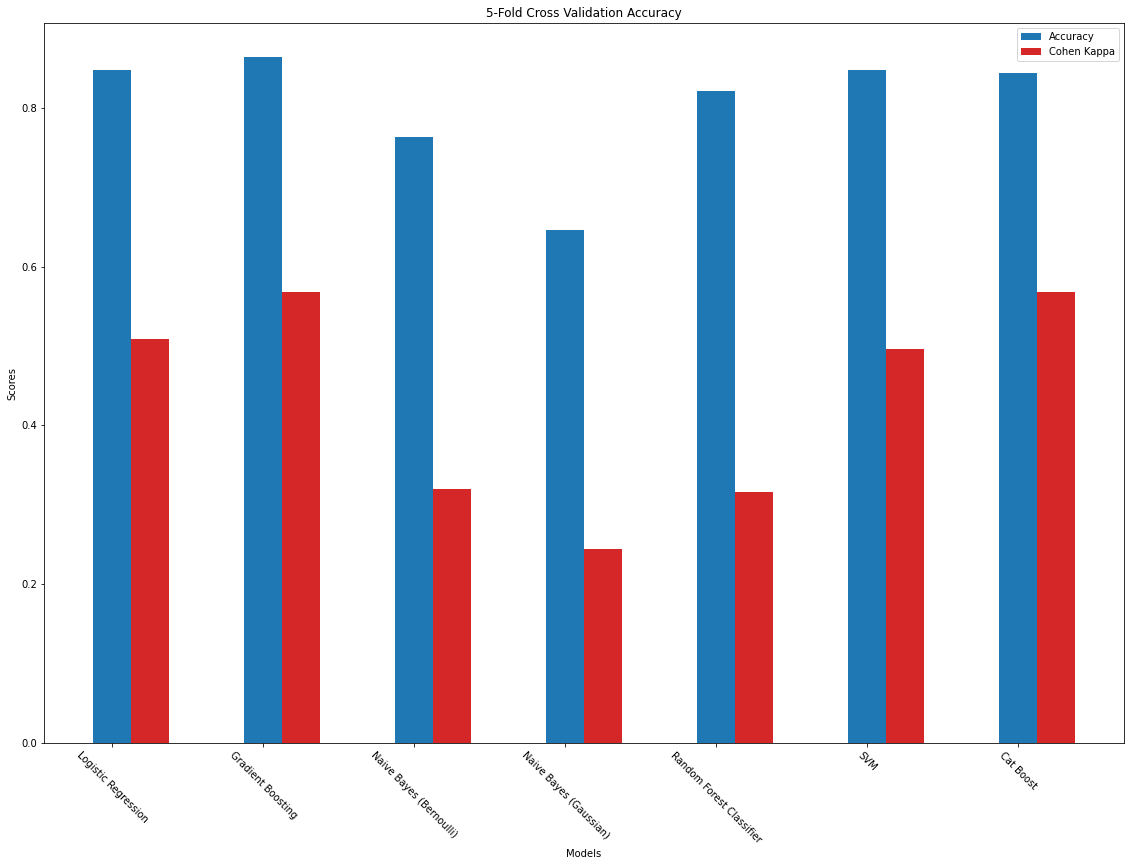

In [235]:

data = [fivefoldaclist,
        fivefoldcklist]
labels = ['Logistic Regression', 'Gradient Boosting', 'Naive Bayes (Bernoulli)', 'Naive Bayes (Gaussian)'
         ,'Random Forest Classifier', 'SVM','Cat Boost']

X = np.arange(len(labels))
ind = range(2, len(labels))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects2 = ax.bar(X + 0.00, data[0], color = 'tab:blue', width = 0.25, align="center")
rects3 = ax.bar(X + 0.25, data[1], color = 'tab:red', width = 0.25, align="center")
ax.legend(labels=['Accuracy','Cohen Kappa'], fontsize='medium')
ax.set_ylabel('Scores')
ax.set_xlabel('Models')
ax.set_title('5-Fold Cross Validation Accuracy')

ax.set_xticks(X)
ax.set_xticklabels(labels,rotation=-45)

fig.set_size_inches(15, 10)
